In [6]:
import sys
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import matplotlib.pyplot as plt

In [7]:
full_fn = anndata.read('can_reproducibility/thymus_models/thymus_annotation/annotation/query_and_reference_popv.h5ad')

In [8]:
query = full_fn[full_fn.obs['_dataset']=='query'].copy()
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [9]:
query.obsm['UMAP BBKNN'] = query.obsm['X_bbknn_umap_popv']
query.obsm['Uncorrected'] = query.obsm['X_pca']
query.obsm['Scanorama'] = query.obsm['X_scanorama']
query.obsm['scANVI'] = query.obsm['X_scanvi']
query.obsm['scVI'] = query.obsm['X_scvi']

In [10]:
from scib_metrics.benchmark import Benchmarker

bm = Benchmarker(
    query,
    batch_key="donor_assay",
    label_key="paper_annotation",
    embedding_obsm_keys=["Uncorrected", "UMAP BBKNN", "Scanorama", "scANVI", "scVI"],
    n_jobs=6,
)
bm.benchmark()


/home/cane/miniconda3/envs/popv_new/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
Computing neighbors:   0%|          | 0/5 [00:00<?, ?it/s]2023-03-09 08:20:21.228405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-03-09 08:20:21.834052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such f

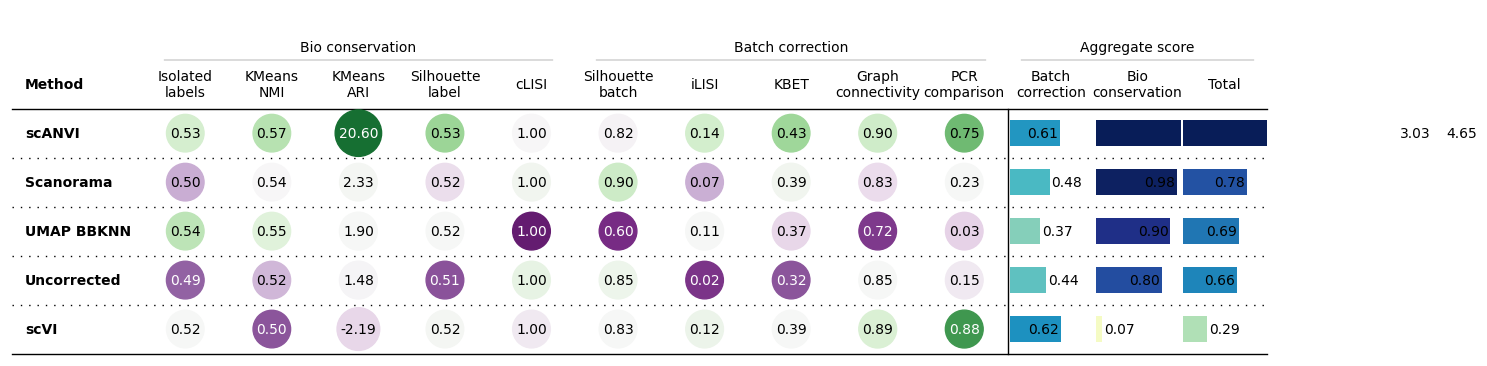

In [11]:
bm.plot_results_table(min_max_scale=False, save_dir='fig4')